<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/3.%20Data%20Preprocessing/DataDistributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before building a machine learning model, it's crucial to understand the distribution of your data. Many algorithms make assumptions about data distribution and feature interactions.

- For instance, almost all models, except for tree-based models, require features to be on the same scale. .

- Most models, other than tree-based ones, assume your data is normally distributed. A normal distribution follows a bell curve, where 68% of the data lies within 1 standard deviation of the mean, 95% within 2 standard deviations, and 99.7% within 3 standard deviations.

Feature engineering can help manipulate your data to fit these distribution assumptions as closely as possible

- Step 1 - What your Data Distribution Looks Like - Different ways to observe individual feature distribution
- Step 2 - Scales across your data - Observe different data scale ranges across features
- Data Transformations
  - Why we need transformations
  - Linear transformations
    - Min Max Scaling, Standarization with when to use what
  - Non linear transformations(Along with what is suitable in which scenario)
    - log normalization - function transformer
    - square root and square ,cube , reciprocal, exponent- function transformer




In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# What Your Data Distribution Looks Like
- ways to observe data distribution - histplot , boxplot for outliers, QQ Plots describe for central tendency
- Normal, right , left distribution
- moderately vs heavily skewed


In [278]:
df_height=pd.read_csv('hs_heights_pair.csv')
# df_sal=pd.read_csv('ds_salaries.csv')
# df_review=pd.read_csv('Train.csv')
df_expectancy=pd.read_csv('Life_Expectancy.csv')
# df_wine=pd.read_csv('WineQT.csv')
# df_auto=pd.read_csv('auto-mpg.csv')

 ## Observing Your Data Distribution with Histograms - Skewness
 To understand your data's shape, you can create histograms for each continuous feature

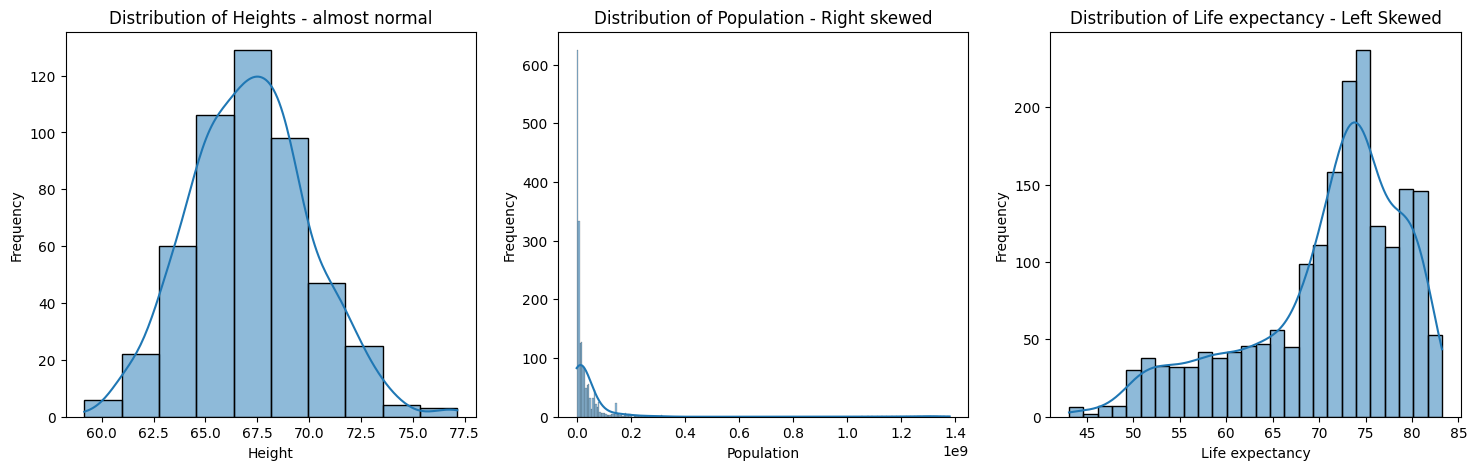

In [279]:
# Creating subplots using Seaborn
fig, axes = plt.subplots(1,3, figsize=(18, 5))
ax=axes.flatten()

sns.histplot(df_height['boys'],bins=10,kde=True,ax=ax[0])
ax[0].set_title('Distribution of Heights - almost normal')
ax[0].set_xlabel('Height')
ax[0].set_ylabel('Frequency')


sns.histplot(df_expectancy['Population'],kde=True,ax=ax[1])
ax[1].set_title('Distribution of Population - Right skewed')
ax[1].set_xlabel('Population')
ax[1].set_ylabel('Frequency')

# sns.histplot(df_review['review_len'],kde=True,ax=ax[2])
# plt.title('Distribution of Review Length')
# plt.xlabel('Review Length')
# plt.ylabel('Frequency')


sns.histplot(df_expectancy['Life Expectancy'],kde=True,ax=ax[2])
ax[2].set_title('Distribution of Life expectancy - Left Skewed')
ax[2].set_xlabel('Life expectancy')
ax[2].set_ylabel('Frequency')
plt.show()

In [280]:
# check skewness
print(df_height['boys'].skew())
print(df_expectancy['Population'].skew())
print(df_expectancy['Life Expectancy'].skew())

0.2252580739947832
6.690956902031846
-0.9822236922214733


Moderately skewed - if skewness is between - 1nd +1

## Delving Deeper with Box Plots - Outliers

Histograms are great for high-level distribution insights but don't show details like the central chunk of your data. For this, use box plots. A box plot displays the distribution by marking the middle 50% (Interquartile Range, IQR) with a box. Whiskers extend to 1.5 times the IQR or the data's maximum range, with outliers marked beyond this. Box plots help identify potential outliers in your dataset.

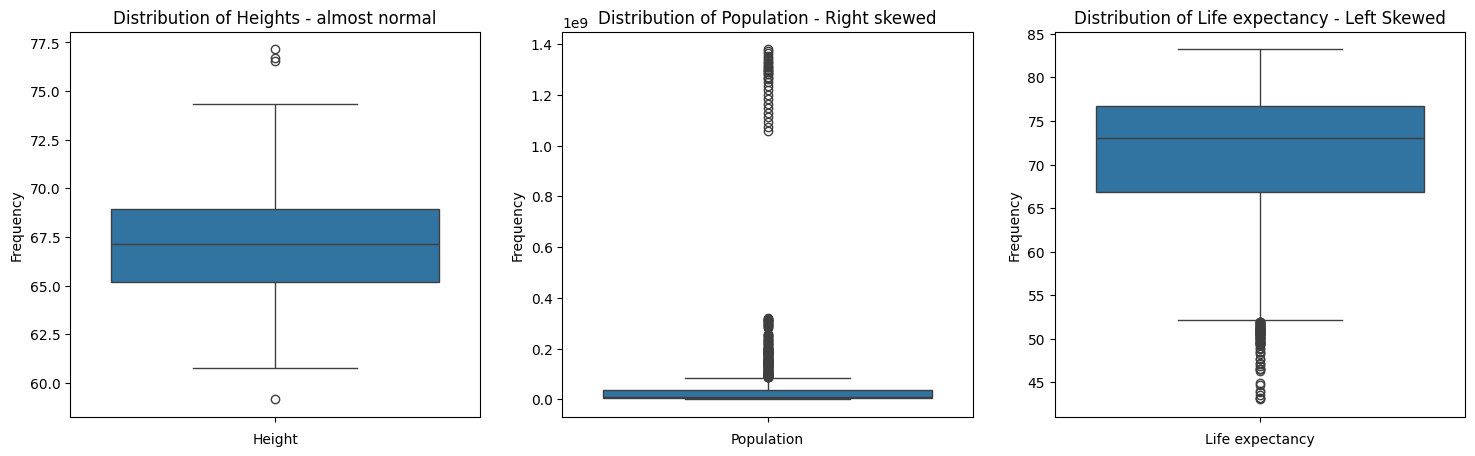

In [281]:
# Creating subplots using Seaborn
fig, axes = plt.subplots(1,3, figsize=(18, 5))
ax=axes.flatten()

sns.boxplot(df_height['boys'],ax=ax[0])
ax[0].set_title('Distribution of Heights - almost normal')
ax[0].set_xlabel('Height')
ax[0].set_ylabel('Frequency')


sns.boxplot(df_expectancy['Population'],ax=ax[1])
ax[1].set_title('Distribution of Population - Right skewed')
ax[1].set_xlabel('Population')
ax[1].set_ylabel('Frequency')

# sns.histplot(df_review['review_len'],kde=True,ax=ax[2])
# plt.title('Distribution of Review Length')
# plt.xlabel('Review Length')
# plt.ylabel('Frequency')


sns.boxplot(df_expectancy['Life Expectancy'],ax=ax[2])
ax[2].set_title('Distribution of Life expectancy - Left Skewed')
ax[2].set_xlabel('Life expectancy')
ax[2].set_ylabel('Frequency')
plt.show()

Beyond plots, you can quickly get summary statistics of your data's distribution using the describe() method. This gives you a comprehensive overview of your data's central tendencies and variability.

## pairplot

In [282]:
# sns.pairplot(df_expectancy)

In [283]:
df_height.describe()

,boys,girls
count,500.000000,500.000000
mean,67.163860,61.977600
std,2.890162,2.117891
min,59.160000,56.680000
25%,65.177500,60.600000
50%,67.130000,62.005000
75%,68.952500,63.380000
max,77.150000,69.350000


#  Why Normal Distribution is Preferred by some ML Algo



 - Like One using gradient descent (linear regression , logistic regression) or the ones which involve eucleadian distance(KNN, KMeans)

In [284]:
df_expectancy['GDP per capita'].skew()

2.2946145639102102

<Axes: xlabel='GDP per capita', ylabel='Life Expectancy'>

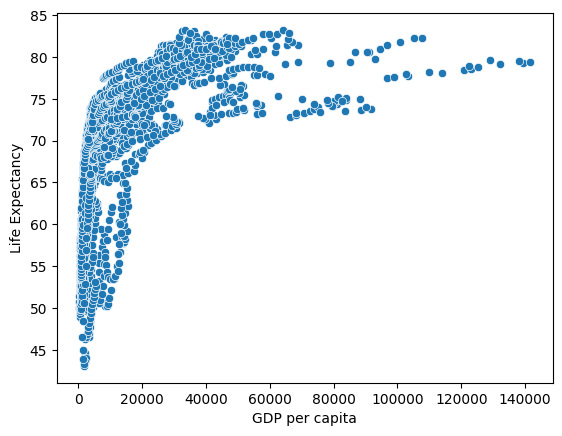

In [285]:
sns.scatterplot(x=df_expectancy['GDP per capita'],y=df_expectancy['Life Expectancy'])

<Axes: xlabel='GDP per capita', ylabel='Life Expectancy'>

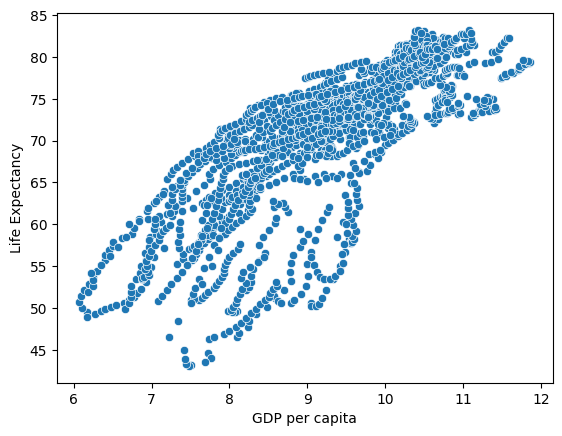

In [286]:
sns.scatterplot(x=np.log(df_expectancy['GDP per capita']),y=df_expectancy['Life Expectancy'])

We can see that we can make better fit line on transformed data

# Part - 3 - Scaling Data

## Observe Scale of Different Features across a Dataset

most machine learning algorithms perform best when your data is on the same scale.

For instance, comparing these different values (often in thousands) with ages can be challenging.

 Real-world data rarely comes pre-scaled, so you need to rescale it. We will explore two popular approaches: Min-Max scaling (or normalization) and standardization.

In [287]:
df_expectancy.head()

,Country,Year,Continent,Least Developed,Life Expectancy,Population,CO2 emissions,Health expenditure,Electric power consumption,Forest area,GDP per capita,Individuals using the Internet,Military expenditure,People practicing open defecation,People using at least basic drinking water services,Obesity among adults,Beer consumption per capita
0,Albania,2000,Europe,False,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431
1,Albania,2001,Europe,False,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995
2,Albania,2002,Europe,False,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697
3,Albania,2003,Europe,False,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830
4,Albania,2004,Europe,False,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617


In [288]:
df_expectancy_sub=df_expectancy[['Beer consumption per capita','GDP per capita','Population']]

In [289]:
df_expectancy_sub.describe()

,Beer consumption per capita,GDP per capita,Population
count,1904.000000,1904.000000,1.904000e+03
mean,2.199408,18094.113142,5.075583e+07
std,1.903435,19389.828835,1.650247e+08
min,0.000000,434.835252,3.331660e+05
25%,0.484170,4614.709959,4.218751e+06
50%,1.791200,11155.012085,1.076918e+07
75%,3.720080,26366.811600,3.692124e+07
max,7.877850,141634.703800,1.379860e+09


In [290]:
print("max of Beer consumption per capita",np.max(df_expectancy_sub['Beer consumption per capita']))
print("max of GDP per capita	 ",np.max(df_expectancy_sub['GDP per capita']))
print("max of Population",np.max(df_expectancy_sub['Population']))

max of Beer consumption per capita 7.87785
max of GDP per capita	  141634.7038
max of Population 1379860000


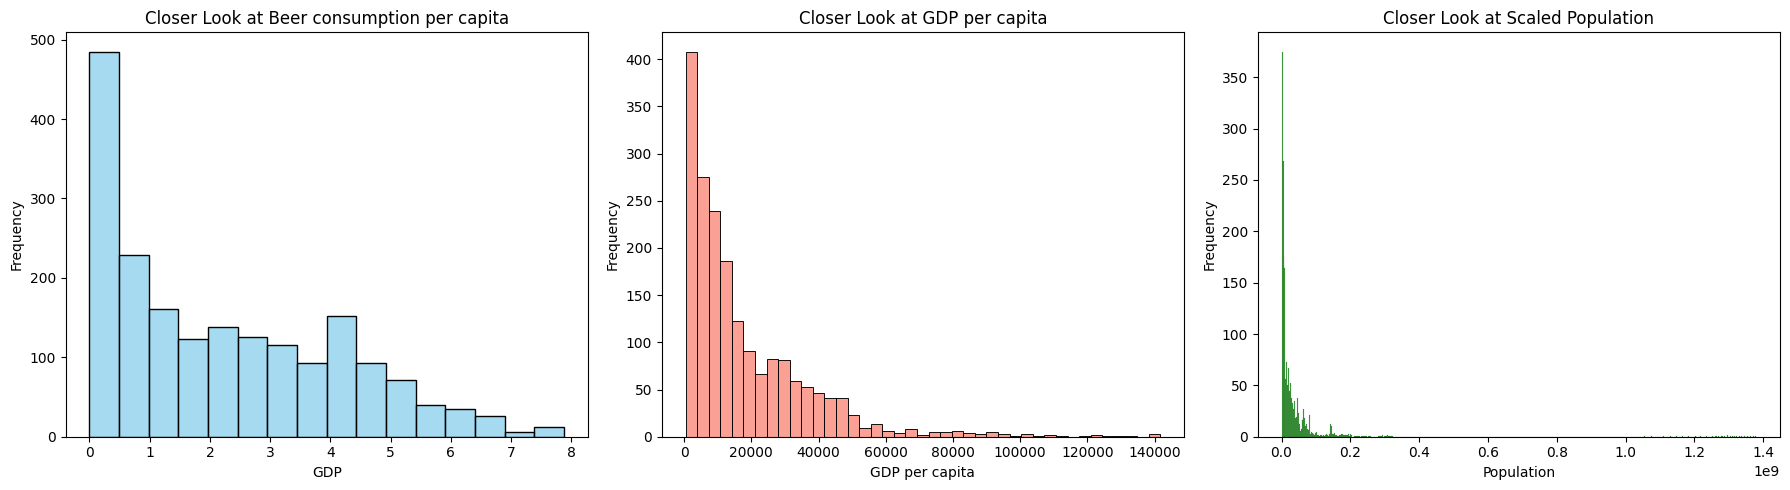

In [291]:
# Creating subplots using Seaborn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plotting histograms using Seaborn for scaled values
sns.histplot(df_expectancy_sub['Beer consumption per capita'], color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Closer Look at Beer consumption per capita')
axes[0].set_xlabel('GDP')
axes[0].set_ylabel('Frequency')

sns.histplot(df_expectancy_sub['GDP per capita'], color='salmon', edgecolor='black', ax=axes[1])
axes[1].set_title('Closer Look at GDP per capita')
axes[1].set_xlabel('GDP per capita')
axes[1].set_ylabel('Frequency')

g = sns.histplot(df_expectancy_sub['Population'], bins=500, color='green', edgecolor='black', ax=axes[2])
axes[2].set_title('Closer Look at Scaled Population')
axes[2].set_xlabel('Population')
axes[2].set_ylabel('Frequency')


# Adjust layout
plt.tight_layout()
plt.show()

# Data Transformation for Statistical Assumption

## Revisiting Terms for Clarity

**Normalization**

In statistics, normalization can refer to different processes, including:

- Scaling Variables: Adjusting values of variables to a common scale when these variables are measured on different scales. This helps in making variables comparable.

 - Example: Rescaling a variable to a range [0, 1](Min Max Scaling)
- Transforming Distributions: Transforming the values of a sample to approximate a normal distribution, which is important for many statistical tests that assume normally distributed data.

 - Example: Applying a log transformation to data that follows an exponential distribution.


**Standardization**

- Standardization specifically refers to transforming data so that it has a mean of 0 and a standard deviation of 1. This process is crucial for methods that assume data is normally distributed and for ensuring that each feature contributes equally to the analysis.

 - Z-score Transformation: A common standardization method that converts data into z-scores, indicating how many standard deviations a data point is from the mean.

**Key Differences**

- Normalization typically scales data to a specific range, such as [0, 1].
- Standardization transforms data to have a mean of 0 and a standard deviation of 1.


## Significance of Train Test Split before Any Data Transformation

In [292]:
#train test split before transformation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_expectancy_sub, df_expectancy['Life Expectancy'], test_size=0.2, random_state=42)


In [293]:
X_train.describe()

,Beer consumption per capita,GDP per capita,Population
count,1523.000000,1523.000000,1.523000e+03
mean,2.164878,17586.956185,4.910382e+07
std,1.897391,18827.275235,1.617431e+08
min,0.000000,434.835252,3.400370e+05
25%,0.475000,4508.975810,4.194102e+06
50%,1.748470,10966.908860,1.084699e+07
75%,3.677880,25388.868705,3.533434e+07
max,7.877850,141634.703800,1.363240e+09


In [294]:
X_test.describe()

,Beer consumption per capita,GDP per capita,Population
count,381.000000,381.000000,3.810000e+02
mean,2.337438,20121.409850,5.735955e+07
std,1.923730,21398.903375,1.776094e+08
min,0.000000,482.335746,3.331660e+05
25%,0.520000,4982.945399,4.299642e+06
50%,2.100000,12857.986510,1.045730e+07
75%,3.945000,28929.526360,3.890295e+07
max,7.748470,138229.769000,1.379860e+09


#

## Linear Transformations - Scaling Techniques
These are the primary techniques to scale down feature and bring them in similar range

- Normalization helps to scale down feature magnitude between 0 and 1
 - Min-Max scaling linearly scales your data between a minimum and maximum value, typically 0 and 1. **This preserves the original distribution while adjusting the scale.**
 - One type is Min Max Scalar
 - Formula used
` (x-x(min))/(x(max)-x(min))`
- Standarization(also known as z-score normalization) helps to scale down based on standard normal distribution


 - This will change the values such that mean =0 and standard deviation is 1
formula used `(x-μ)/σ`

In [305]:
# check skewness
print("Skew: Beer consumption per capita",df_expectancy_sub['Beer consumption per capita'].skew())
print("Skew: GDP per capita",df_expectancy_sub['GDP per capita'].skew())
print("Skew: Population",df_expectancy_sub['Population'].skew())


Skew: Beer consumption per capita 0.6454869631364103
Skew: GDP per capita 2.2946145639102102
Skew: Population 6.690956902031846


### Example of Min Max Scaling


In [295]:
### Example of Min Max Scaling

from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
scaled_data =min_max_scaler.fit_transform(X_train)


# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_expectancy_sub.columns)


# View the range of the transformed data
print("Min values after scaling:")
print(scaled_df.min())
print("\nMax values after scaling:")
print(scaled_df.max())

Min values after scaling:
Beer consumption per capita    0.0
GDP per capita                 0.0
Population                     0.0
dtype: float64

Max values after scaling:
Beer consumption per capita    1.0
GDP per capita                 1.0
Population                     1.0
dtype: float64


In [306]:
# check skewness
print("Skew: Beer consumption per capita",scaled_df['Beer consumption per capita'].skew())
print("Skew: GDP per capita",scaled_df['GDP per capita'].skew())
print("Skew: Population",scaled_df['Population'].skew())

Skew: Beer consumption per capita 0.6878329058087724
Skew: GDP per capita 2.2979021390146883
Skew: Population 6.83816557779693


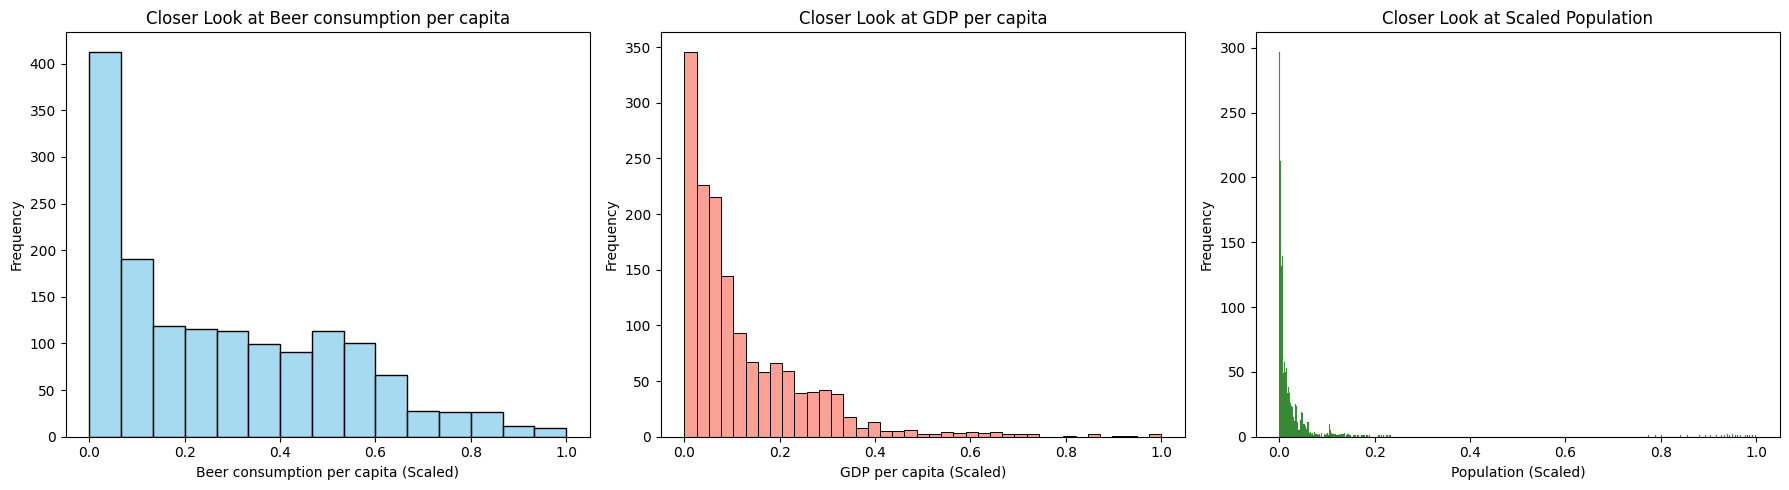

In [296]:
# Creating subplots using Seaborn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plotting histograms using Seaborn for scaled values
sns.histplot(scaled_df['Beer consumption per capita'], color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Closer Look at Beer consumption per capita')
axes[0].set_xlabel('Beer consumption per capita (Scaled)')
axes[0].set_ylabel('Frequency')

sns.histplot(scaled_df['GDP per capita'], color='salmon', edgecolor='black', ax=axes[1])
axes[1].set_title('Closer Look at GDP per capita')
axes[1].set_xlabel('GDP per capita (Scaled)')
axes[1].set_ylabel('Frequency')

sns.histplot(scaled_df['Population'], bins=500, color='green', edgecolor='black', ax=axes[2])
axes[2].set_title('Closer Look at Scaled Population')
axes[2].set_xlabel('Population (Scaled)')
axes[2].set_ylabel('Frequency')


# Adjust layout
plt.tight_layout()
plt.show()

- Notice that the distribution remains intact after Min Max Scaling
- While normalization can be useful for scaling a column between two data points, it is hard to compare two scaled columns if even one of them is overly affected by outliers.

### Example of Standardization

 One commonly used solution to this is called standardization, where instead of having a strict upper and lower bound, you center the data around its mean, and calculate the number of standard deviations away from mean each data point is.

In [297]:
from sklearn.preprocessing import StandardScaler
standard_scale=StandardScaler()
standard_scale_data =standard_scale.fit_transform(X_train)
df_standard_scale_data = pd.DataFrame(standard_scale_data, columns=df_expectancy_sub.columns)

In [298]:
# variance is same for all the features and close to 1
df_standard_scale_data.var()

Beer consumption per capita    1.000657
GDP per capita                 1.000657
Population                     1.000657
dtype: float64

In [299]:
# values have scaled down
df_standard_scale_data.head()

,Beer consumption per capita,GDP per capita,Population
0,0.600539,1.900370,-0.255798
1,-0.705515,-0.434923,0.099212
2,-0.616954,-0.725156,7.664643
3,0.313756,1.116128,-0.275459
4,-1.114990,-0.873724,-0.184697


In [307]:
# check skewness
print("Skew: Beer consumption per capita",df_standard_scale_data['Beer consumption per capita'].skew())
print("Skew: GDP per capita",df_standard_scale_data['GDP per capita'].skew())
print("Skew: Population",df_standard_scale_data['Population'].skew())

Skew: Beer consumption per capita 0.6878329058087728
Skew: GDP per capita 2.2979021390146888
Skew: Population 6.83816557779693


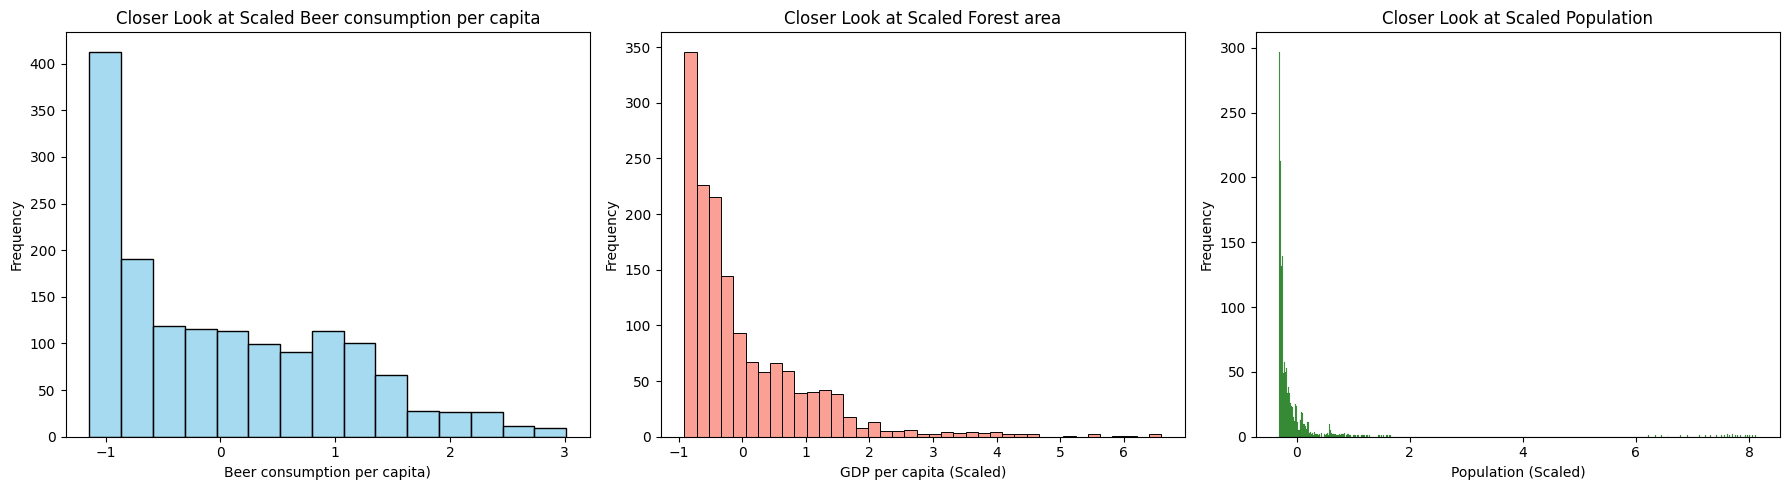

In [300]:


# Creating subplots using Seaborn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plotting histograms using Seaborn for scaled values
sns.histplot(df_standard_scale_data['Beer consumption per capita'], color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Closer Look at Scaled Beer consumption per capita')
axes[0].set_xlabel('Beer consumption per capita)')
axes[0].set_ylabel('Frequency')

sns.histplot(df_standard_scale_data['GDP per capita'], color='salmon', edgecolor='black', ax=axes[1])
axes[1].set_title('Closer Look at Scaled Forest area')
axes[1].set_xlabel('GDP per capita (Scaled)')
axes[1].set_ylabel('Frequency')

g = sns.histplot(df_standard_scale_data['Population'], bins=500, color='green', edgecolor='black', ax=axes[2])
axes[2].set_title('Closer Look at Scaled Population')
axes[2].set_xlabel('Population (Scaled)')
axes[2].set_ylabel('Frequency')

# # Setting x-axis limits for the Population subplot
# g.set(xlim=(0, 1))  # Assuming the scaled population is within the range [0, 1]

# Adjust layout
plt.tight_layout()
plt.show()

With this values get scaled linearly but not within certain limits

**In both Min Max Scaling and Standard Deviation , shape of distribution remains same**

# Data Transformations - Part 2



- Log Normalization
- Box Cox Transformation

In [301]:
# log normalization
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p)
log_transformed_data = log_transformer.fit_transform(X_train)
df_log_transformed_data = pd.DataFrame(log_transformed_data, columns=df_expectancy_sub.columns)

df_log_transformed_data.var()

Beer consumption per capita    0.398698
GDP per capita                 1.295308
Population                     2.421843
dtype: float64

In [308]:
# check skewness
print("Skew: Beer consumption per capita",df_log_transformed_data['Beer consumption per capita'].skew())
print("Skew: GDP per capita",df_log_transformed_data['GDP per capita'].skew())
print("Skew: Population",df_log_transformed_data['Population'].skew())


Skew: Beer consumption per capita -0.026234614618259412
Skew: GDP per capita -0.34147111416009424
Skew: Population 0.24630205151669599


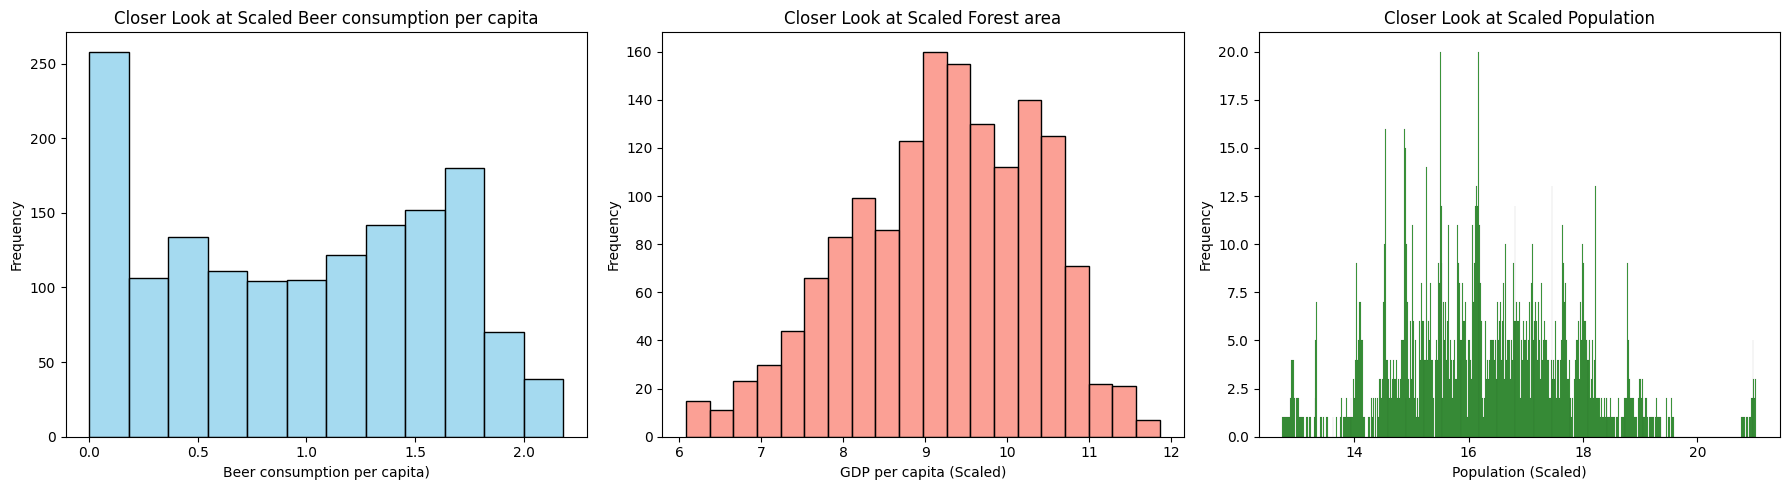

In [302]:
# Creating subplots using Seaborn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plotting histograms using Seaborn for scaled values
sns.histplot(df_log_transformed_data['Beer consumption per capita'], color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Closer Look at Scaled Beer consumption per capita')
axes[0].set_xlabel('Beer consumption per capita)')
axes[0].set_ylabel('Frequency')

sns.histplot(df_log_transformed_data['GDP per capita'], color='salmon', edgecolor='black', ax=axes[1])
axes[1].set_title('Closer Look at Scaled Forest area')
axes[1].set_xlabel('GDP per capita (Scaled)')
axes[1].set_ylabel('Frequency')

g = sns.histplot(df_log_transformed_data['Population'], bins=500, color='green', edgecolor='black', ax=axes[2])
axes[2].set_title('Closer Look at Scaled Population')
axes[2].set_xlabel('Population (Scaled)')
axes[2].set_ylabel('Frequency')

# # Setting x-axis limits for the Population subplot
# g.set(xlim=(0, 1))  # Assuming the scaled population is within the range [0, 1]

# Adjust layout
plt.tight_layout()
plt.show()


og transformation decreased the scale of the distributions

Log transformations are often used to transform right-skewed data, however, the transformation has a major shortcoming which is that it only works for positive non-zero data. This is due to the mathematical properties of the logarithmic function.

If you find out that your data have a 0 values but you would still like to use log transformation you can add a constant to the variable before performing the transformation, for example log(x + 1) where x is the variable. This way you can get rid of the negative or zero values. You can do this either manually or using log1p() function. However, you should use this method with caution as adding a constant changes the properties of the logartihm and it might not transform the data in a desirable way.

## Square root Transformation

As you can see the logarithmic function levels off much more quickly which means that it constrains large values much more strongly than square-root. As a result, with log transformation extreme values in the dataset will become less important. The plots also indicate that square-root transformation has the same disadvantage as log transformation - it can only be used on positive non-zero data.



[log vs sqrt](https://stackoverflow.com/questions/42038294/is-complexity-ologn-equivalent-to-osqrtn/42038398)




In [331]:
# square root transformation

from sklearn.preprocessing import FunctionTransformer
sqrt_transformer = FunctionTransformer(np.sqrt)
sqrt_transformed_data = sqrt_transformer.fit_transform(X_train)
df_sqrt_transformed_data = pd.DataFrame(sqrt_transformed_data, columns=df_expectancy_sub.columns)

df_sqrt_transformed_data.var()

Beer consumption per capita    5.259346e-01
GDP per capita                 3.906559e+03
Population                     2.561176e+07
dtype: float64

In [310]:
# check skewness
print("Skew: Beer consumption per capita",df_sqrt_transformed_data['Beer consumption per capita'].skew())
print("Skew: GDP per capita",df_sqrt_transformed_data['GDP per capita'].skew())
print("Skew: Population",df_sqrt_transformed_data['Population'].skew())

Skew: Beer consumption per capita -0.051294426697160354
Skew: GDP per capita 0.8765993390001079
Skew: Population 3.8546378484508104


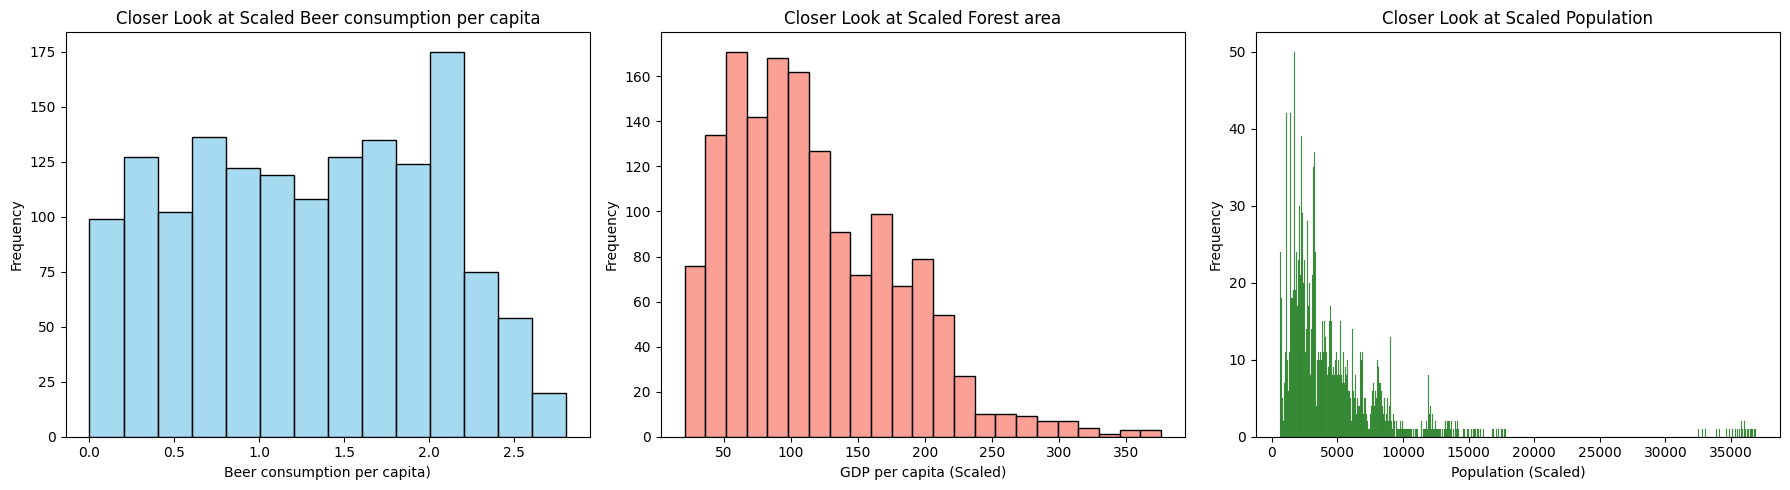

In [311]:
# Creating subplots using Seaborn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plotting histograms using Seaborn for scaled values
sns.histplot(df_sqrt_transformed_data['Beer consumption per capita'], color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Closer Look at Scaled Beer consumption per capita')
axes[0].set_xlabel('Beer consumption per capita)')
axes[0].set_ylabel('Frequency')

sns.histplot(df_sqrt_transformed_data['GDP per capita'], color='salmon', edgecolor='black', ax=axes[1])
axes[1].set_title('Closer Look at Scaled Forest area')
axes[1].set_xlabel('GDP per capita (Scaled)')
axes[1].set_ylabel('Frequency')

g = sns.histplot(df_sqrt_transformed_data['Population'], bins=500, color='green', edgecolor='black', ax=axes[2])
axes[2].set_title('Closer Look at Scaled Population')
axes[2].set_xlabel('Population (Scaled)')
axes[2].set_ylabel('Frequency')

# # Setting x-axis limits for the Population subplot
# g.set(xlim=(0, 1))  # Assuming the scaled population is within the range [0, 1]

# Adjust layout
plt.tight_layout()
plt.show()

# Squared Transformation

In [332]:
df_expectancy['Life Expectancy'].skew()

-0.9822236922214733

<Axes: xlabel='Life Expectancy', ylabel='Count'>

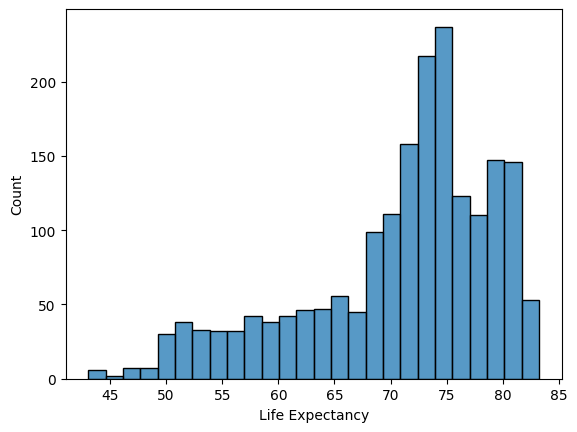

In [314]:
sns.histplot(df_expectancy['Life Expectancy'])

In [334]:
# apply squared transformation
from sklearn.preprocessing  import FunctionTransformer
squared_transformer = FunctionTransformer(np.square)
squared_transformed_data = squared_transformer.fit_transform(df_expectancy['Life Expectancy'])

df_squared_transformed_data= pd.DataFrame(squared_transformed_data, columns=['Life Expectancy'])

<Axes: xlabel='Life Expectancy', ylabel='Count'>

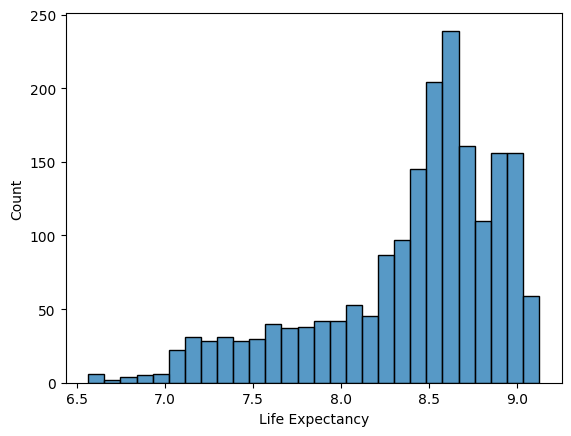

In [325]:
sns.histplot(df_squared_transformed_data['Life Expectancy'])

In [329]:
df_squared_transformed_data['Life Expectancy'].skew()

-0.7353297941851826

# Finally scaling and Transforming New Data

You might wonder why we don't refit the scaler or calculate thresholds based on the new data. The reason is to avoid data leakage. Data leakage occurs when information from outside the training dataset is used to create the model, leading to overly optimistic performance estimates. In real-world scenarios, you won't have access to future data when you deploy your model, so you must rely solely on the training data for all preprocessing steps.

Avoid Data Leakage!
To prevent data leakage, always fit and calibrate your preprocessing steps using only the training data. This practice ensures that your model's performance metrics reflect its true predictive power on unseen data, thereby providing a more accurate assessment.

By following these guidelines, you can confidently apply your model to new data, knowing that your preprocessing steps are consistent and that you've avoided the pitfalls of data leakage.

In [335]:
# check skewness
print("Skew: Beer consumption per capita",X_test['Beer consumption per capita'].skew())
print("Skew: GDP per capita",X_test['GDP per capita'].skew())
print("Skew: Population",X_test['Population'].skew())

Skew: Beer consumption per capita 0.48490570034742897
Skew: GDP per capita 2.2270010854550035
Skew: Population 6.205583770655955


In [337]:
log_transformer.transform(X_test)
log_transformed_test_data = log_transformer.fit_transform(X_test)
df_log_transformed_test_data = pd.DataFrame(log_transformed_test_data, columns=df_expectancy_sub.columns)


In [338]:
# check skewness
print("Skew: Beer consumption per capita",df_log_transformed_test_data['Beer consumption per capita'].skew())
print("Skew: GDP per capita",df_log_transformed_test_data['GDP per capita'].skew())
print("Skew: Population",df_log_transformed_test_data['Population'].skew())

Skew: Beer consumption per capita -0.15790075645713214
Skew: GDP per capita -0.33119601129040727
Skew: Population 0.3159886136925379


# Next - Handling Outliers

We will work on log transformed training data

Outliers are one cause of non-normality or non-Gaussian behavior and transformation can reduce the influence of existing outliers.

<Axes: xlabel='Beer consumption per capita'>

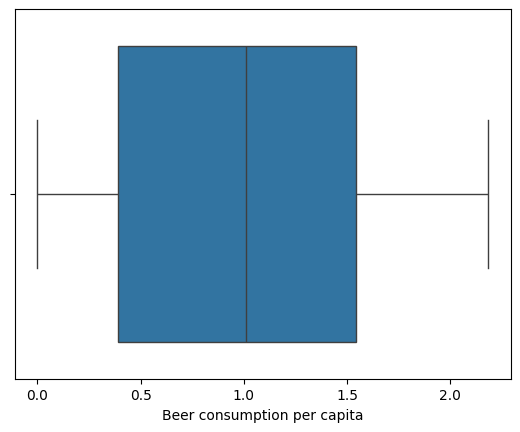

In [339]:
sns.boxplot(x=df_log_transformed_data['Beer consumption per capita'])

<Axes: xlabel='GDP per capita'>

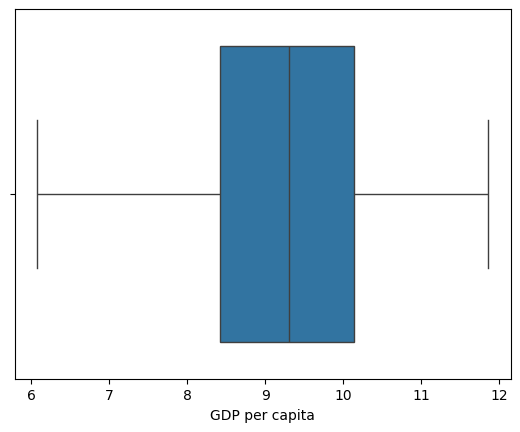

In [340]:
sns.boxplot(x=df_log_transformed_data['GDP per capita'])

<Axes: xlabel='Population'>

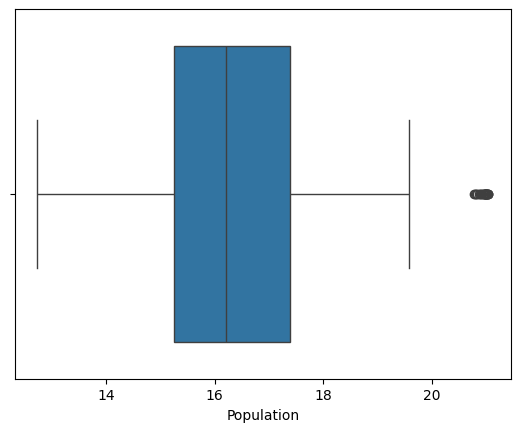

In [341]:
sns.boxplot(x=df_log_transformed_data['Population'])